In [18]:
# Import pandas and numpy libraries for data manipulation
import pandas as pd
import numpy as np

# Define the file path to the Titanic training dataset (raw string avoids escape character issues)
path = r"C:\Users\ASUS\Desktop\Campus\3rd Year\second\Nature Inspired Algorithms\Dataset\Titanic_train.csv"

# Read the CSV file into a DataFrame called 'dataset'
dataset = pd.read_csv(path)

# Display the first few rows of the dataset to inspect the data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
# Check the shape of the dataset to understand its dimensions
dataset.shape

(891, 12)

In [20]:
# Check for missing values in each column of the dataset
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
# Drop rows with missing values in the 'Cabin' column
# ca = dataset['Cabin'].dropna()  
# Display the first few rows of the 'cabin' column after dropping missing values
# ca.head()


In [22]:
# Display the shape of the 'cabin' column after dropping missing values
# ca.shape


In [28]:
age_mean = dataset['Age'].mean()  # Calculate the mean of the 'Age' column
cabin_mode = dataset['Cabin'].mode()[0]  # Calculate the mode of the 'Cabin' column
embarked_mode = dataset['Embarked'].mode()[0]  # Calculate the mode of the 'Embarked' column

print(f"Mean Age: {age_mean}")
print(f"Mode Cabin: {cabin_mode}")  
print(f"Mode Embarked: {embarked_mode}")

Mean Age: 29.69911764705882
Mode Cabin: B96 B98
Mode Embarked: S


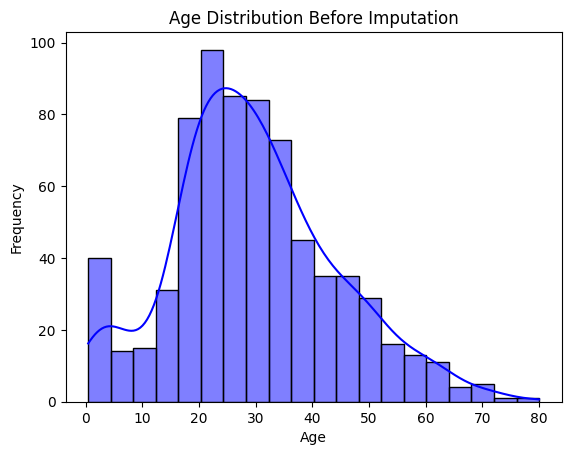

In [ ]:
# Visualize the distribution of the 'Age' column before imputing missing values
# This helps to understand the data and the effect of imputation
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(dataset['Age'].dropna(), kde=True, color='blue')
plt.title("Age Distribution Before Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [33]:
# Impute missing values in 'Age' with the mean and print the new mean to verify imputation
# This shows that after filling missing values, the mean remains the same
# Useful for confirming the imputation process

dataset['Age'] = dataset['Age'].fillna(age_mean)  # Impute missing values in 'Age' with the mean
print(dataset['Age'].mean())

29.69911764705882


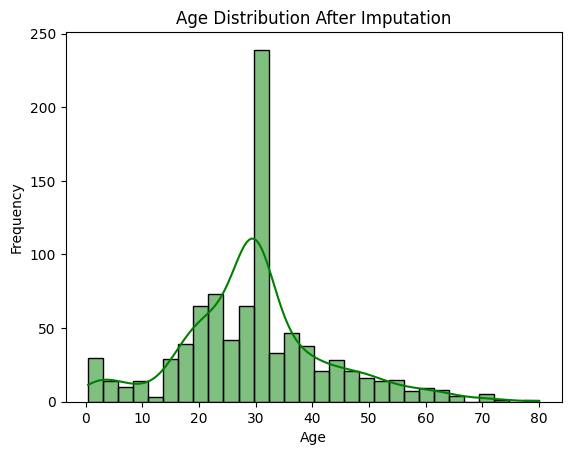

In [ ]:
# Visualize the distribution of the 'Age' column after imputing missing values
# This helps to compare the effect of imputation on the data distribution

sns.histplot(dataset['Age'].dropna(), kde=True, color='green')
plt.title("Age Distribution After Imputation")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [37]:
from sklearn.impute import SimpleImputer
# Create a copy of the dataset for further processing
dataset_1 = dataset.copy()
# Create an imputer object with a strategy to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the 'Age' column and transform it to fill missing values
dataset_1['Age'] = imputer.fit_transform(dataset_1[['Age']])

print("Mean Age after imputation:", dataset_1['Age'].mean())



Mean Age after imputation: 29.69911764705882


In [41]:
from sklearn.impute import KNNImputer
# Create a KNN imputer object with 5 neighbors
imputer = KNNImputer(n_neighbors=5)
# Fit the imputer on the 'Age' and 'Fare' columns and transform them to fill missing values
dataset_1[['Age', 'Fare']] = imputer.fit_transform(dataset_1[['Age', 'Fare']])
print("Mean Age after KNN imputation:", dataset_1['Age'].mean())


Mean Age after KNN imputation: 29.69911764705882


In [42]:
dataset.groupby(['Sex', 'Pclass'])['Age'].agg(['mean', 'median'])

mean     median
Sex    Pclass                      
female 1       34.141405  32.500000
       2       28.748661  28.500000
       3       24.068493  28.000000
male   1       39.287717  36.000000
       2       30.653908  29.699118
       3       27.372153  29.699118